In [ ]:
#Importing data files for cleaning

In [3]:
import pandas as pd

In [4]:
bom_df = pd.read_csv('bom.movie_gross.csv')

In [5]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


There are null values in the studio (5 values), domestic_gross (28 values), and foreign_gross columns(1,350 values).
The title, studio and foreign_gross values are all objects, whereas the domestic_gross value is a float, and the year value is an integer

In [6]:
bom_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [7]:
bom_df['year'] = pd.to_datetime(bom_df['year'], format='%Y')
bom_df['year']

0      2010-01-01
1      2010-01-01
2      2010-01-01
3      2010-01-01
4      2010-01-01
          ...    
3382   2018-01-01
3383   2018-01-01
3384   2018-01-01
3385   2018-01-01
3386   2018-01-01
Name: year, Length: 3387, dtype: datetime64[ns]

After reviewing the descriptive stats, we decided to replace the NaN values for the domestic_product column with median values to control for outliers.

In [8]:
bom_df['domestic_gross'].fillna(bom_df['domestic_gross'].median())

0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3382         6200.0
3383         4800.0
3384         2500.0
3385         2400.0
3386         1700.0
Name: domestic_gross, Length: 3387, dtype: float64

In [9]:
bom_df['domestic_gross'] = bom_df['domestic_gross'].fillna(bom_df['domestic_gross'].median())

Now we need to deal with the null values in the foreign_gross column.
Because we're not interested in foreign gross for our initial movie, we're going to drop this column.

In [10]:
bom_df = bom_df.drop('foreign_gross', axis=1)

In [11]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3387 non-null   object        
 1   studio          3382 non-null   object        
 2   domestic_gross  3387 non-null   float64       
 3   year            3387 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 106.0+ KB


Now we just have one column remaining with null values, the studio column. 
Since this is such a small amount (5), we're electing to drop all of the rows that remain with null values.

In [12]:
bom_df.dropna(inplace = True)

In [32]:
bom_df

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010-01-01
1,Alice in Wonderland (2010),BV,334200000.0,2010-01-01
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010-01-01
3,Inception,WB,292600000.0,2010-01-01
4,Shrek Forever After,P/DW,238700000.0,2010-01-01
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018-01-01
3383,Edward II (2018 re-release),FM,4800.0,2018-01-01
3384,El Pacto,Sony,2500.0,2018-01-01
3385,The Swan,Synergetic,2400.0,2018-01-01


We now have a clean dataset, ready to run some analysis!

Doing some beginning data analysis

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

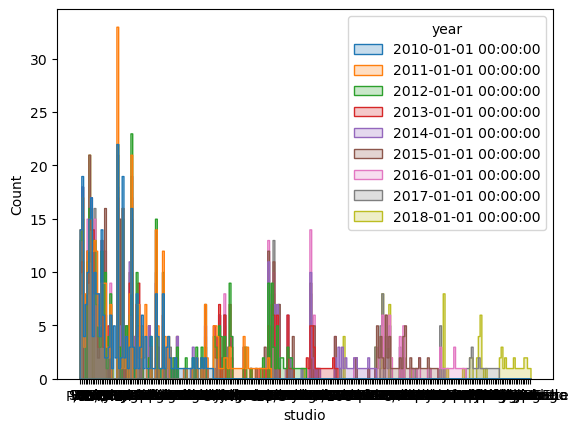

In [31]:
sns.histplot(x = 'studio', hue = 'year', element='step', data = bom_df)
plt.show()